<a href="https://colab.research.google.com/github/sandheepgopinath/Computer-Vision/blob/master/Face_mask_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face Mask Segmentation
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Change current working directory to project folder (1 mark)

In [0]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


The Directory has now been changed to the required Folder

### **Load the "images.npy" file (2 marks)**
- This file contains images with details of bounding boxes 

In [0]:
import numpy as np
data =np.load('images.npy',allow_pickle=True)

### Check one sample from the loaded "images.npy" file  (2 marks)
Hint - print data[10][1] 

In [0]:
print(data[10][1])

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.48, 'y': 0.10385756676557864}, {'x': 0.7716666666666666, 'y': 0.6795252225519288}], 'imageWidth': 600, 'imageHeight': 337}]


In [0]:
im=data[10][0]
img=cv2.resize(im,(224,224))

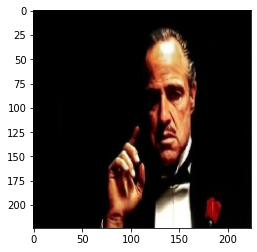

In [0]:
plt.imshow(img)

### Set image dimensions   (2 marks)
- Initialize image height, image width with value: 224 

In [0]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [0]:
import cv2
from keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

In [0]:
X_test=np.zeros((9,224,224,3))
mask=np.zeros((9,224,224))
x_train=np.zeros((400,224,224,3))
x_mask=np.zeros((400,224,224))
index=[]
j=0
k=0
for i in range(X_train.shape[0]):
  if i>=400:
    X_test[j]=X_train[i]
    mask[j]=masks[i]
    index.append(i)
    j+=1
  else:
    x_train[k]=X_train[i]
    x_mask[k]=masks[i]
    k+=1

### Print the shape of X_train and mask array  (2 marks)

In [0]:
x_train.shape

(400, 224, 224, 3)

In [0]:
x_mask.shape

(400, 224, 224)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


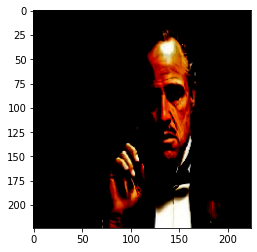

In [0]:
plt.imshow(x_train[10])

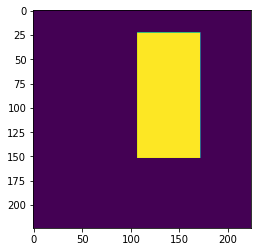

In [0]:
plt.imshow(x_mask[10])

In [0]:
x_mask.shape

(400, 224, 224)

### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

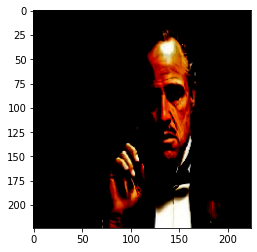

In [0]:
from matplotlib import pyplot
n = 10
print(x_train[n])
pyplot.imshow(x_train[n])

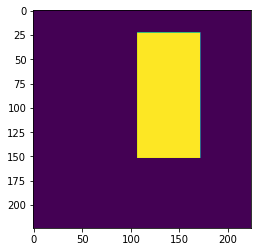

In [0]:
pyplot.imshow(x_mask[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
from keras.applications.mobilenet import MobileNet
from keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape,Flatten,Dense
from keras.models import Model


def create_model(n_layers=5,trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3),include_top=False,alpha=1,weights='imagenet')
    
    for i in model.layers:
      i.trainable=trainable
      
    block1=model.get_layer("conv_pw_1_relu").output
    block2=model.get_layer("conv_pw_3_relu").output
    block3=model.get_layer("conv_pw_5_relu").output
    block4=model.get_layer("conv_pw_11_relu").output
    block5=model.get_layer("conv_pw_13_relu").output
    
    x=Concatenate(axis=3)([UpSampling2D()(block5),block4])
    x=Conv2D(512,kernel_size=(3,3),padding='same',activation='relu')(x)
    x=Concatenate(axis=3)([UpSampling2D()(x),block3])
    x=Conv2D(256,kernel_size=(3,3),padding='same',activation='relu')(x)
    x=Concatenate(axis=3)([UpSampling2D()(x),block2])
    x=Conv2D(128,kernel_size=(3,3),padding='same',activation='relu')(x)
    x=Concatenate(axis=3)([UpSampling2D()(x),block1])
    x=Conv2D(64,kernel_size=(3,3),padding='same',activation='relu')(x)
    x=Concatenate(axis=3)([UpSampling2D()(x),model.input])
    x=Conv2D(32,kernel_size=(3,3),padding='same',activation='relu')(x)
    x=Conv2D(1,kernel_size=(3,3),padding='same',activation='sigmoid')(x)
    x=Reshape((224,224))(x)
    return Model(inputs=model.input,outputs=x)

### Call the create_model function

In [0]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model(False)

# Print summary
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
____________________________________________________________________________________________

### Define dice coefficient function (10 marks)
- Create a function to calculate dice coefficient


In [0]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (3 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
from keras.losses import mean_squared_error

model.compile(loss=loss, optimizer="adam", metrics=[dice_coefficient])


### Define checkpoint and earlystopping

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (3 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [0]:
model.fit(x_train,x_mask,epochs=5,batch_size=5, use_multiprocessing=False,shuffle=True,callbacks=[reduce_lr, stop],verbose=1)

Epoch 1/5
400/400 [==============================] - 17s 44ms/step - loss: 1.4555 - dice_coefficient: 0.4777
Epoch 2/5
400/400 [==============================] - 11s 27ms/step - loss: 0.6221 - dice_coefficient: 0.6690
Epoch 3/5
400/400 [==============================] - 11s 27ms/step - loss: 0.5278 - dice_coefficient: 0.7133
Epoch 4/5
400/400 [==============================] - 11s 27ms/step - loss: 0.4277 - dice_coefficient: 0.7599
Epoch 5/5
400/400 [==============================] - 11s 26ms/step - loss: 0.4093 - dice_coefficient: 0.7703


In [0]:
model.evaluate(X_test,mask,batch_size=10)

9/9 [==============================] - 1s 74ms/step


[0.8424572348594666, 0.6123773455619812]

### Get the predicted mask for a sample image   (5 marks)

In [0]:
n = 10
sample_image = X_train[n]


#### Add your code here ####

### Impose the mask on the image (5 marks)

In [0]:
#### Add your code here ####

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


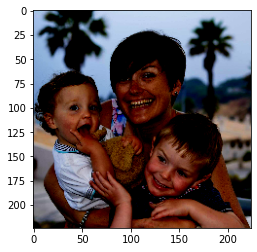

In [0]:
plt.imshow(X_test[0])

In [0]:
x=model.predict(X_test,batch_size=5)

In [0]:
mask.shape

(9, 224, 224)

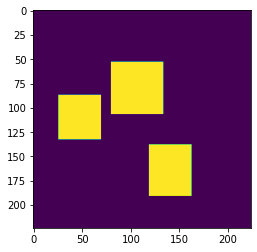

In [0]:
plt.imshow(mask[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


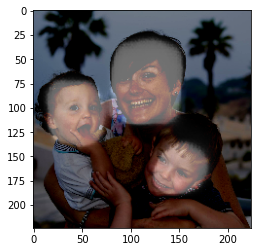

In [0]:
plt.imshow(X_test[0])
plt.imshow(x[0],cmap='gray',alpha=0.45)